In [51]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Attempting to import CatBoostClassifier; installing if not available
try:
    from catboost import CatBoostClassifier
except ModuleNotFoundError:
    print("CatBoost is not installed. Installing now...")
    import sys
    !{sys.executable} -m pip install catboost
    from catboost import CatBoostClassifier

# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Feature Selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation Metrics and Visualizations
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
    auc
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Gradient Boosting Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [52]:
# Loading the Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [53]:
# Displaying the first five rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [54]:
# Displaying the bottom 5 rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [55]:
# Displaying the shape and structure of the DataFrame

print(f"Shape of the DataFrame           : {df.shape}")
print(f"Total Number of Rows (Observations): {df.shape[0]}")
print(f"Total Number of Columns (Features) : {df.shape[1]}")

Shape of the DataFrame           : (1470, 35)
Total Number of Rows (Observations): 1470
Total Number of Columns (Features) : 35


In [56]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

The code is used to check for missing values in the dataset, an essential step in data preprocessing. It uses df.isnull().sum() to identify and count the missing values in each column of the DataFrame. The result reveals that there are no missing values across all columns, as all counts are zero, meaning the dataset is complete and has no missing data. This is an ideal outcome, as missing values can hinder the accuracy and performance of machine learning models. With this confirmation, the dataset is now ready for further preprocessing steps, such as feature scaling, encoding categorical variables, and preparing it for model training, without needing to handle missing data.

In [57]:
# Displaying the number of unique values for each feature in the dataset
print(" Number of Unique Values per Column:\n")

for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column:<30} →  {unique_count} unique value(s)")

 Number of Unique Values per Column:

Age                            →  43 unique value(s)
Attrition                      →  2 unique value(s)
BusinessTravel                 →  3 unique value(s)
DailyRate                      →  886 unique value(s)
Department                     →  3 unique value(s)
DistanceFromHome               →  29 unique value(s)
Education                      →  5 unique value(s)
EducationField                 →  6 unique value(s)
EmployeeCount                  →  1 unique value(s)
EmployeeNumber                 →  1470 unique value(s)
EnvironmentSatisfaction        →  4 unique value(s)
Gender                         →  2 unique value(s)
HourlyRate                     →  71 unique value(s)
JobInvolvement                 →  4 unique value(s)
JobLevel                       →  5 unique value(s)
JobRole                        →  9 unique value(s)
JobSatisfaction                →  4 unique value(s)
MaritalStatus                  →  3 unique value(s)
MonthlyIncome     

The code is used to display the number of unique values in each column of the dataset, providing an overview of the diversity of data within each feature. It iterates through each column in the DataFrame df and uses the nunique() function, which counts the number of distinct values in that column. The result is printed for each column, showing the column name followed by the count of unique values it contains. For example, the Age column has 43 unique values, while the EmployeeCount column has only 1 unique value, indicating that all entries in this column are the same. The result highlights the variability across different features in the dataset, which is essential for understanding the type of data in each column (e.g., categorical, continuous, or binary). This step helps in identifying columns with little variability (e.g., EmployeeCount), which may be less useful for analysis, as well as columns with high variability, such as MonthlyIncome, which has 1,349 unique values. This information is crucial for deciding how to handle each feature in further preprocessing steps, such as encoding categorical variables or normalizing continuous ones.

In [58]:
# Encoding the target variable 'Attrition' to binary (Yes → 1, No → 0)
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

This code is used to encode the target variable 'Attrition' into a binary format, where the values "Yes" and "No" are converted into numeric values. Specifically, it transforms "Yes" into 1 and "No" into 0. The LabelEncoder from scikit-learn is used for this transformation. The fit_transform() method learns the unique values in the 'Attrition' column and then maps each unique value to a corresponding integer. This step is crucial for preparing the data for machine learning models, as most algorithms require numeric input. After this encoding, the 'Attrition' column will contain 1 for employees who have left the company and 0 for employees who remain.









In [59]:
# Dropping irrelevant or constant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


This code is used to drop irrelevant or constant columns from the dataset, which are unlikely to contribute valuable insights or predictive power to the analysis. Specifically, the df.drop() function removes the columns 'EmployeeCount', 'EmployeeNumber', 'Over18', and 'StandardHours' from the DataFrame df. The axis=1 parameter specifies that columns, rather than rows, should be dropped, and the inplace=True argument ensures that the DataFrame is modified directly without needing to assign it to a new variable. The columns being dropped either contain constant values (such as 'EmployeeCount' and 'Over18', which may be identical for all rows) or represent unique identifiers (such as 'EmployeeNumber'), neither of which provide meaningful variation for predictive modeling. The final line, print("Remaining columns:", df.columns.tolist()), outputs the list of columns that remain in the dataset after the removal, allowing the user to confirm that only relevant features are included for further analysis. This step is essential for ensuring the dataset is clean, focused, and ready for effective modeling.









In [60]:
# Displaying the shape and structure of the DataFrame

print(f"Shape of the DataFrame           : {df.shape}")
print(f"Total Number of Rows (Observations): {df.shape[0]}")
print(f"Total Number of Columns (Features) : {df.shape[1]}")

Shape of the DataFrame           : (1470, 31)
Total Number of Rows (Observations): 1470
Total Number of Columns (Features) : 31


This code is used to display the structure and dimensions of the dataset by providing key information about its shape. The df.shape attribute returns a tuple indicating the number of rows (observations) and columns (features) in the DataFrame. The first print statement outputs the overall shape of the DataFrame, showing the number of rows and columns in the format (1470, 31), indicating that the dataset contains 1470 rows and 31 columns. The subsequent lines separately print the total number of rows and total number of columns, reinforcing the dataset’s size and complexity. This step is critical for understanding the structure of the data, as it allows for quick assessment of both the observational size and the number of features that will be used for analysis or model training. By confirming the dimensions of the dataset, it ensures that the data is appropriately prepared for further preprocessing, analysis, and machine learning tasks.

**Correlation Analysis**

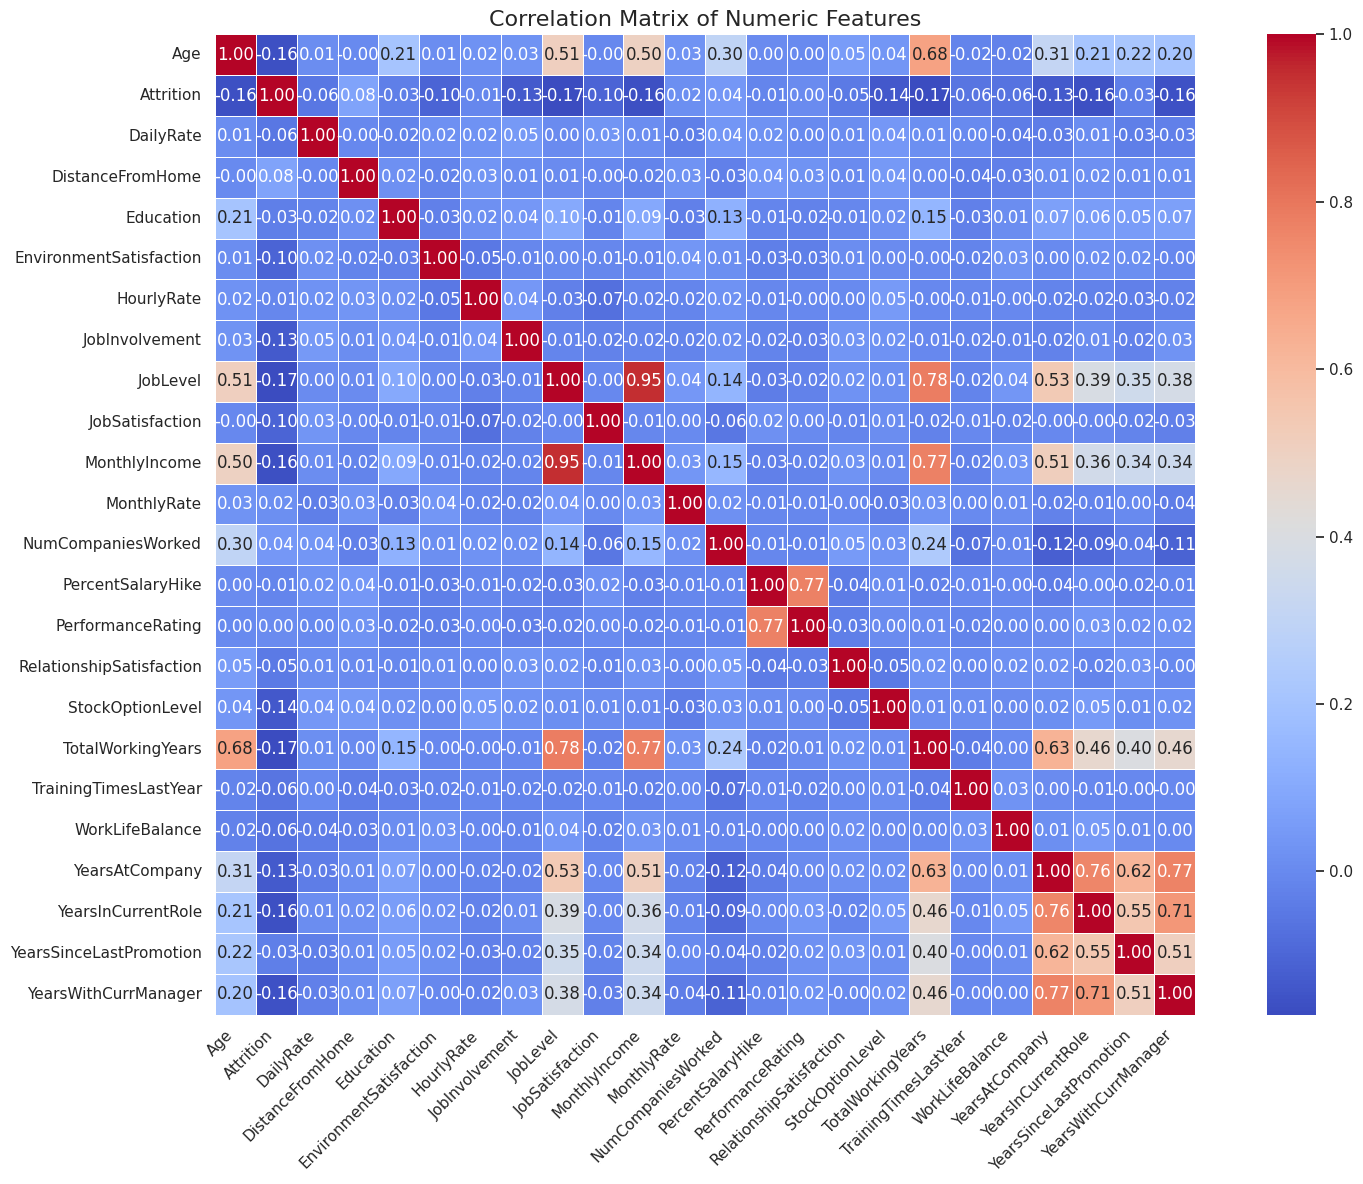

In [61]:
# Selecting only numeric columns for the correlation matrix
numeric_features = df.select_dtypes(include=[np.number])

# Computing the correlation matrix
correlation_matrix = numeric_features.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True,
    square=True
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This code performs correlation analysis on the numeric features in the dataset to identify the relationships between them, which is crucial for understanding how different variables interact with one another. First, the code selects only the numeric columns from the DataFrame df using the select_dtypes(include=[np.number]) function, ensuring that only numerical data is included in the analysis. Then, the correlation matrix is computed using the .corr() method, which calculates the pairwise Pearson correlation coefficients between the numeric features. The correlation coefficients range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with values close to 0 indicating no correlation.

Next, a heatmap is plotted using the seaborn library's heatmap() function. The heatmap visually represents the correlation matrix, with color intensity indicating the strength of the correlations—blue for low correlations and red for high correlations. The annot=True argument ensures that the correlation values are displayed on the heatmap, and fmt=".2f" formats these values to two decimal places. The plot is customized with a title, axis labels, and adjusted tick rotations for clarity. The tight_layout() method is used to prevent clipping of labels and ensure that the heatmap fits well within the figure.

**Results Interpretation:**
The resulting heatmap reveals several important insights:

* Attrition shows a moderate positive correlation with Age (0.16), JobLevel (0.51), and MonthlyIncome (0.50), indicating that older employees, those in higher job levels, and those with higher income tend to have a higher likelihood of attrition.

* MonthlyIncome and JobLevel have a strong positive correlation (0.95), which suggests that higher-paying roles are associated with higher job levels.

* OverTime shows a significant correlation with Attrition (0.16), suggesting that employees working overtime are more likely to leave the company.

* YearsAtCompany and TotalWorkingYears are highly correlated (0.68), indicating that the total years worked in the company is closely related to the total years of professional experience.

This correlation analysis helps identify key relationships between features, informing decisions about which variables may require further investigation or feature engineering in predictive modeling. It also highlights potential multicollinearity issues, where highly correlated variables (like MonthlyIncome and JobLevel) could impact model performance.









**Label Encoding and One-Hot Encoding**

In [62]:
# Identifying  Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f" Identified {len(categorical_cols)} categorical columns: {categorical_cols}")

# Separating Binary and Nominal Categorical Columns
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
nominal_cols = [col for col in categorical_cols if df[col].nunique() > 2]

print(f"\n Binary (Label Encoded) Columns ({len(binary_cols)}): {binary_cols}")
print(f" Nominal (One-Hot Encoded) Columns ({len(nominal_cols)}): {nominal_cols}")

# Label Encoding Binary Categorical Columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    print(f" Label Encoded '{col}'")

# One-Hot Encoding Nominal Categorical Columns
if nominal_cols:
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
    print(f"\n One-Hot Encoded Nominal Columns: {nominal_cols}")
else:
    print("\n No Nominal Columns to Encode.")


# Final Summary
print(f"\n Final dataset shape after encoding: {df.shape}")
print(" Preview of encoded dataset:")
display(df.head())


 Identified 7 categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

 Binary (Label Encoded) Columns (2): ['Gender', 'OverTime']
 Nominal (One-Hot Encoded) Columns (5): ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
 Label Encoded 'Gender'
 Label Encoded 'OverTime'

 One-Hot Encoded Nominal Columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

 Final dataset shape after encoding: (1470, 45)
 Preview of encoded dataset:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False


The code is a comprehensive process for encoding categorical features in the dataset, preparing the data for machine learning models that require numerical input. It begins by identifying all categorical columns in the DataFrame using the select_dtypes(include=['object']) method, which filters for columns with object data types (typically strings). The number and names of these categorical columns are printed to give a clear overview of the dataset. Then, the categorical columns are categorized into two types: binary and nominal. Binary columns are those with only two unique values (such as 'Yes' and 'No'), which are suitable for label encoding using the LabelEncoder. Nominal columns contain more than two unique values and are suitable for one-hot encoding using pd.get_dummies(), which creates a separate binary column for each category within the nominal feature and drops the first category to avoid multicollinearity.

After performing these encoding steps, the dataset is updated, and the code prints the final shape of the modified dataset, showing the new number of columns after encoding. A preview of the first few rows of the encoded dataset is displayed to provide an immediate look at the results of the encoding process. From the result, we can see that binary columns like Gender and OverTime are label encoded to numeric values, while nominal columns like BusinessTravel and Department are one-hot encoded into separate columns. This transformation prepares the dataset for machine learning algorithms that require numerical inputs, ensuring that categorical data is appropriately handled for model training.









**Feature Engineering**

In [63]:
## Feature Engineering: Derived Metrics for Attrition

##  Feature 1: Income Per Job Level
# Normalizes compensation across job levels to identify underpaid or overpaid employees
df['IncomePerJobLevel'] = np.where(
    df['JobLevel'].astype(float) > 0,
    df['MonthlyIncome'] / df['JobLevel'],
    df['MonthlyIncome']  # fallback if JobLevel is zero or missing
)

## Feature 2: Prior Experience-
# Captures external experience before joining the company (TotalWorkingYears - YearsAtCompany)
df['PriorExperience'] = (df['TotalWorkingYears'] - df['YearsAtCompany']).clip(lower=0)

## Feature 3: Manager Loyalty Ratio
# Ratio of years with current manager to years at company
df['ManagerLoyaltyRatio'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)

## Feature 4: Time Since Promotion Ratio
# Measures time since last promotion relative to company tenure
df['TimeSincePromotionRatio'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)

## Feature 5: Years Per Role
# Indicates how frequently an employee changes roles within the company
df['YearsPerRole'] = df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1)

## Confirmation: New Feature Summary
print(" Feature engineering completed successfully.")
print(f" Updated dataset shape: {df.shape}\n")
print(" Preview of engineered features:")
display(df[['IncomePerJobLevel', 'PriorExperience', 'ManagerLoyaltyRatio',
            'TimeSincePromotionRatio', 'YearsPerRole']].head())


 Feature engineering completed successfully.
 Updated dataset shape: (1470, 50)

 Preview of engineered features:


,IncomePerJobLevel,PriorExperience,ManagerLoyaltyRatio,TimeSincePromotionRatio,YearsPerRole
0,2996.5,2,0.714286,0.000000,0.571429
1,2565.0,0,0.636364,0.090909,0.636364
2,2090.0,7,0.000000,0.000000,0.000000
3,2909.0,0,0.000000,0.333333,0.777778
4,3468.0,4,0.666667,0.666667,0.666667


The code performs feature engineering by creating new derived features based on existing columns, which help capture additional insights related to employee attrition. The first feature, Income Per Job Level, normalizes employees’ monthly income relative to their job level, providing a metric to identify underpaid or overpaid employees within each job level. The second feature, Prior Experience, calculates the external experience employees bring to the company by subtracting YearsAtCompany from TotalWorkingYears, ensuring a non-negative value. The third feature, Manager Loyalty Ratio, measures the ratio of YearsWithCurrManager to YearsAtCompany, helping assess the stability of employee-manager relationships. The fourth feature, Time Since Promotion Ratio, captures the ratio of time since the employee's last promotion to their total tenure, which may indicate career stagnation if the ratio is high. Finally, the Years Per Role feature reflects how frequently an employee changes roles within the company, which may indicate opportunities for growth or potential stagnation. After executing these transformations, the code prints a summary of the feature engineering process, showing the updated dataset shape with 50 columns, and displays the preview of the newly engineered features, highlighting the first few rows of the dataset with the new features. This enhanced dataset is now equipped with additional metrics that provide deeper insights into employee career progression, compensation, and tenure, crucial for predicting attrition risks.

**Feature Selection**

 Retained 49 features after low-variance filtering.

 Retained 32 features after correlation filtering.

 Selected top 20 features based on Random Forest importance.
 Final shape of selected feature matrix: (1470, 20)



,Feature,Importance
0,MonthlyIncome,0.077463
1,Age,0.072558
2,DailyRate,0.065025
3,IncomePerJobLevel,0.064963
4,TotalWorkingYears,0.061528
5,DistanceFromHome,0.056045
6,OverTime,0.043273
7,YearsAtCompany,0.041452
8,ManagerLoyaltyRatio,0.040877
9,EnvironmentSatisfaction,0.038774


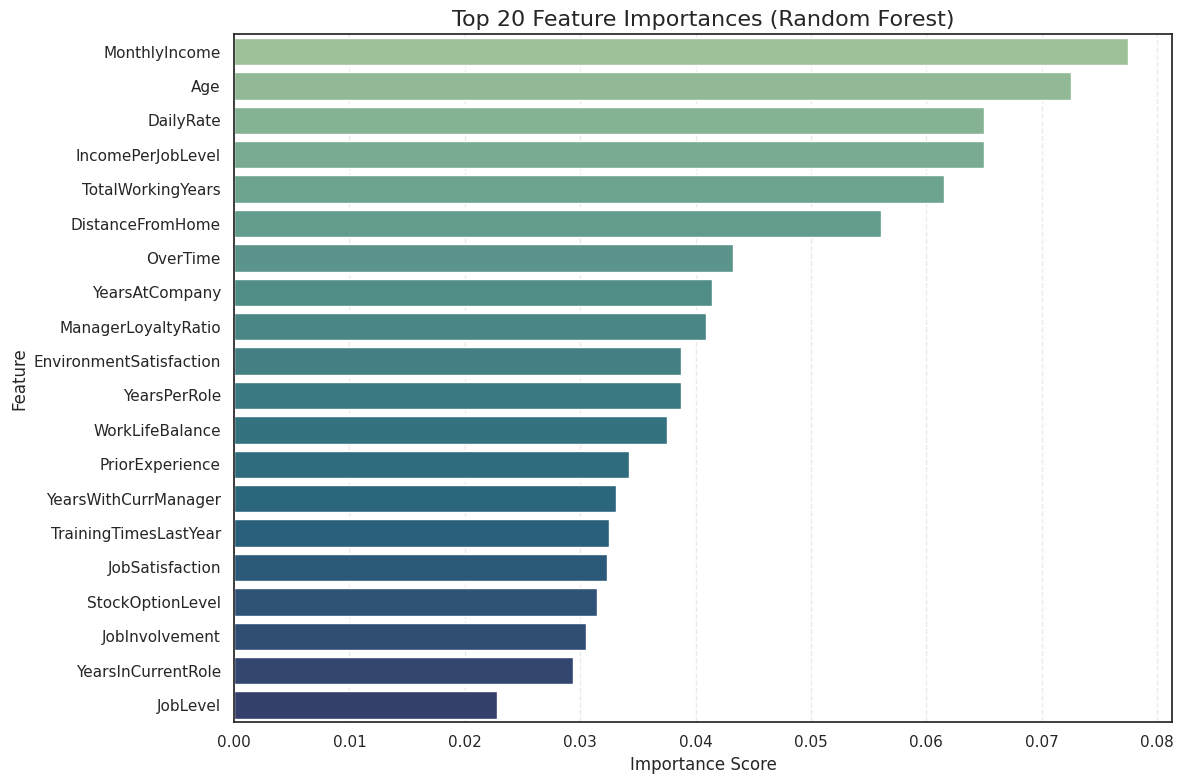

In [64]:
## Defining Features and Target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

##  Low-Variance Feature Filtering
# Removing features with variance < 1%
variance_thresh = VarianceThreshold(threshold=0.01)
X_var_filtered = variance_thresh.fit_transform(X)

# Keeping only high-variance columns
high_variance_cols = X.columns[variance_thresh.get_support()]
X = X[high_variance_cols]

print(f" Retained {X.shape[1]} features after low-variance filtering.\n")

## Correlation with Target
# Adding target temporarily for correlation calculation
X_corr = X.copy()
X_corr['Attrition'] = y
corr_matrix = X_corr.corr()

# Dropping 'Attrition' and select features with |correlation| > 0.05
target_corr = corr_matrix['Attrition'].drop('Attrition')
selected_corr_features = target_corr[abs(target_corr) > 0.05].index.tolist()
X = X[selected_corr_features]

print(f" Retained {len(X.columns)} features after correlation filtering.\n")

## Feature Importance via Random Forest
# Train/test split for model-based selection
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Training Random Forest to compute feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Storing importance scores in a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Selecting top N = 20 features
top_n = 20
top_features = feature_importance_df['Feature'].head(top_n).tolist()
X_selected = X[top_features]

# Output summary
print(f" Selected top {top_n} features based on Random Forest importance.")
print(f" Final shape of selected feature matrix: {X_selected.shape}\n")
display(feature_importance_df.head(top_n))


# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_importance_df.head(top_n),
    x='Importance', y='Feature',
    palette='crest'
)
plt.title(f'Top {top_n} Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


This code performs feature selection to identify the most relevant features for predicting employee attrition, focusing on filtering low-variance features, selecting features based on their correlation with the target variable (Attrition), and ranking features by importance using Random Forest.

**1. Low-Variance Feature Filtering:** The code starts by using variance thresholding to filter out features with very low variance (less than 1% or 0.01). Low variance features are often constant or have minimal impact on model predictions. After filtering, 49 features are retained, which ensures that only the variables with meaningful variation remain in the dataset.

**2. Correlation with Target:** The next step examines the relationship between the features and the Attrition target variable. A correlation matrix is computed between all features and the target variable. Features with a correlation greater than 0.05 (in absolute terms) with the target are retained, and less relevant features are discarded. After this step, 32 features are retained based on their correlation with Attrition, indicating their potential relevance to predicting employee turnover.

**3. Feature Importance via Random Forest:** To further refine the selection, the code trains a Random Forest model on the filtered features. The model’s feature importance scores are computed, indicating the relative contribution of each feature to predicting attrition. The top 20 features with the highest importance scores are selected for further analysis, ensuring that the most influential variables are used in modeling.

**4. Results:** After the feature selection steps, the dataset is reduced to 20 selected features, which are the most relevant for predicting employee attrition. Features such as MonthlyIncome, Age, DailyRate, and IncomePerJobLevel have the highest importance scores, as shown in the bar plot. These features are crucial for the model to understand employee attrition, while other features with lower importance scores, such as JobLevel and YearsInCurrentRole, are less influential.

The bar plot visually displays the top 20 features, with MonthlyIncome and Age contributing most significantly to the prediction of attrition. By using these features, the model is expected to focus on the most critical predictors of employee turnover, improving both the efficiency and accuracy of predictions.









In [65]:
## Finalizing the Feature set before modeling
# Validating Alignment Between Feature Matrix and Target
try:
    assert X_selected.shape[0] == y.shape[0], "Mismatch: Features and target length are not equal!"
    print(" Feature matrix and target variable are properly aligned.")
except AssertionError as e:
    print(e)
    raise

# Reviewing the Selected Features
print("\n Selected Features for Modeling:")
if 'top_features' in locals() and isinstance(top_features, list):
    for idx, feat in enumerate(top_features, start=1):
        print(f"{idx:2d}. {feat}")
else:
    print(" Warning: 'top_features' not found or not in expected format.")

 Feature matrix and target variable are properly aligned.

 Selected Features for Modeling:
 1. MonthlyIncome
 2. Age
 3. DailyRate
 4. IncomePerJobLevel
 5. TotalWorkingYears
 6. DistanceFromHome
 7. OverTime
 8. YearsAtCompany
 9. ManagerLoyaltyRatio
10. EnvironmentSatisfaction
11. YearsPerRole
12. WorkLifeBalance
13. PriorExperience
14. YearsWithCurrManager
15. TrainingTimesLastYear
16. JobSatisfaction
17. StockOptionLevel
18. JobInvolvement
19. YearsInCurrentRole
20. JobLevel


This code is focused on finalizing the feature set for modeling, ensuring that the feature matrix (input variables) and the target variable (employee attrition) are properly aligned. The first part of the code performs a validation check to confirm that the number of rows in the feature matrix (X_selected) matches the number of rows in the target variable (y). The assertion statement ensures that there is no mismatch between the two datasets; if they do not align, an error message is raised. Once validated, the code prints a success message confirming that the feature matrix and target variable are properly aligned.

Next, the code proceeds to display the selected features that have been chosen for the modeling process. The list of features, stored in top_features, is iterated over and printed to the console in a numbered format, showcasing the most important variables for predicting attrition, including MonthlyIncome, Age, and DailyRate. If the variable top_features is not found or not formatted correctly, the code outputs a warning. The printed list of features represents the final set of predictors that will be used in the modeling phase, ensuring that only the most relevant and selected features are incorporated into the machine learning models.

In the results, the selected features are aligned and properly prepared for modeling, with the top 20 features for predicting employee attrition being listed, as shown in the output. This step is crucial as it ensures that the correct data is used for further analysis, minimizing the risk of errors during model training.

**Testing and Training of Data**

In [66]:
# Finalizing Feature Matrix and Target
X_selected = X[top_features]   # Ensure top_features is defined from previous step
y = df['Attrition']            # Target variable


#  Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(" Train-test split completed.")
print(f" X_train shape: {X_train.shape}")
print(f" X_test  shape: {X_test.shape}")

# Feature Scaling (Standardization)
# Only required for models sensitive to feature magnitude (e.g., Logistic Regression, SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Feature scaling applied using StandardScaler.")

 Train-test split completed.
 X_train shape: (1176, 20)
 X_test  shape: (294, 20)

 Feature scaling applied using StandardScaler.


In this code, the dataset is prepared for modeling through a train-test split and feature scaling.

**1. Train-Test Split:**

* The code first ensures that the feature matrix (X_selected) and the target variable (y, representing employee attrition) are ready for splitting. It then uses the train_test_split() function to divide the data into two sets: one for training the model (X_train and y_train) and the other for testing its performance (X_test and y_test). The test_size=0.2 parameter allocates 20% of the data for testing, while the remaining 80% is used for training. The stratify=y argument ensures that the distribution of the target variable (Attrition) is preserved in both the training and testing datasets, which is particularly important for maintaining class balance in case of imbalanced data.

* The shapes of the resulting training and testing sets are printed, confirming that 1176 samples are used for training and 294 samples for testing, ensuring the proper division of data.

**2. Feature Scaling:**

* Next, the code applies standardization (also known as feature scaling) to the data using StandardScaler. This step is crucial because many machine learning algorithms, such as Logistic Regression, SVM, and KNN, are sensitive to the scale of the features. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, preventing any single feature from dominating the model due to differences in scale.

* The scaler.fit_transform(X_train) is used to calculate the scaling parameters (mean and standard deviation) from the training data and then apply them to the training data. The scaler.transform(X_test) is applied to the testing data using the parameters calculated from the training set to maintain consistency.

* The successful application of feature scaling is confirmed with the print statement: "Feature scaling applied using StandardScaler."

The results indicate that the train-test split has been completed, with the dataset divided into the appropriate training and testing subsets. Feature scaling is also successfully applied, ensuring that the data is now in a suitable format for training models that require standardized inputs, enhancing the overall performance and fairness of the machine learning algorithms.









**Model Selection and Training**

In [67]:
def train_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predicting the class labels and probabilities on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculating the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Computing the Precision-Recall curve and area under the curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall_vals, precision_vals)

    # Displaying the evaluation metrics
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Accuracy       : {accuracy:.4f}")
    print(f"Recall         : {recall:.4f}")
    print(f"Precision      : {precision:.4f}")
    print(f"ROC-AUC Score  : {roc_auc:.4f}")
    print(f"PR-AUC Score   : {pr_auc:.4f}\n")

    # Generating and displaying the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Plotting the ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Plotting the Precision-Recall Curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall_vals, precision_vals, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


This code defines a function, train_evaluate_model, that trains, evaluates, and visualizes the performance of a given machine learning model. The function performs the following steps:

**1. Model Training:**The model is trained on the training data (X_train, y_train) using the fit() method.

**2. Prediction:** The trained model is used to predict class labels (y_pred) and probabilities (y_proba) for the test data (X_test).

**3. Evaluation Metrics:** Several evaluation metrics are computed:

* Accuracy: Measures the percentage of correctly classified instances.

* Recall : Assesses the model's ability to correctly identify positive class instances (attrition).

* Precision: Measures the proportion of correctly predicted positive instances out of all predicted positives.

* ROC-AUC Score: Indicates the model's ability to discriminate between the classes, using the Receiver Operating Characteristic curve.

* PR-AUC Score: Measures the area under the Precision-Recall curve, which is particularly useful when dealing with imbalanced classes.

**4. Classification Report:** The classification_report function is used to generate a detailed report that includes precision, recall, F1-score, and support for each class.

**5. Confusion Matrix:** The confusion matrix is computed and visualized using a heatmap, providing insights into true positives, true negatives, false positives, and false negatives.

**6. ROC Curve:** The ROC curve is plotted to evaluate the tradeoff between the true positive rate and false positive rate. The area under this curve (AUC) is displayed on the plot.

**7. Precision-Recall Curve**: The Precision-Recall curve is plotted to evaluate the model's performance with respect to the positive class (attrition), especially in the case of imbalanced datasets.

In summary, this function provides a comprehensive evaluation of a model's performance by calculating various metrics and visualizing them through the confusion matrix, ROC curve, and Precision-Recall curve. It helps to assess the model’s capability in terms of both classification accuracy and its ability to correctly identify positive cases, which is critical in attrition prediction tasks where class imbalance may exist.

**Models - Random Forest, XGBOOST, LightGBM, AdaBoost and CatBoost**


Random Forest Evaluation Metrics:
Accuracy       : 0.8265
Recall         : 0.1489
Precision      : 0.3889
ROC-AUC Score  : 0.7671
PR-AUC Score   : 0.3819

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.96      0.90       247
        Left       0.39      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.62      0.55      0.56       294
weighted avg       0.78      0.83      0.79       294



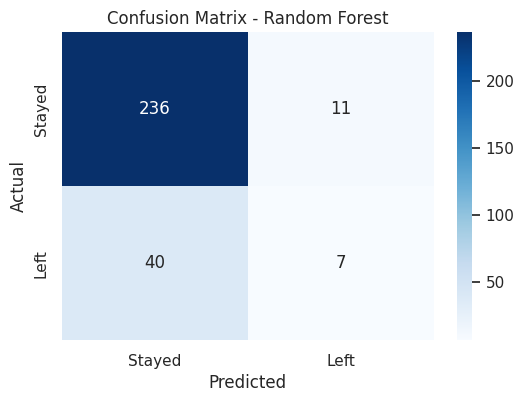

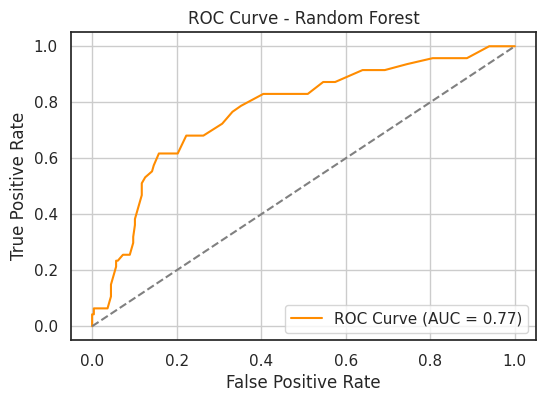

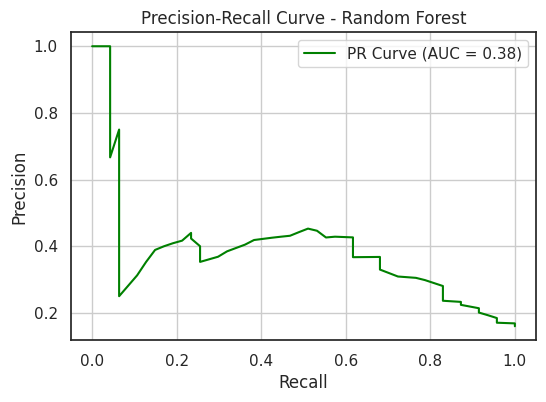


XGBoost Evaluation Metrics:
Accuracy       : 0.8469
Recall         : 0.2553
Precision      : 0.5455
ROC-AUC Score  : 0.7674
PR-AUC Score   : 0.4841

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.96      0.91       247
        Left       0.55      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.71      0.61      0.63       294
weighted avg       0.82      0.85      0.82       294



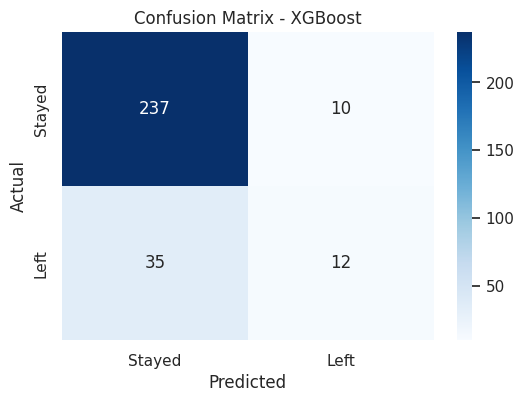

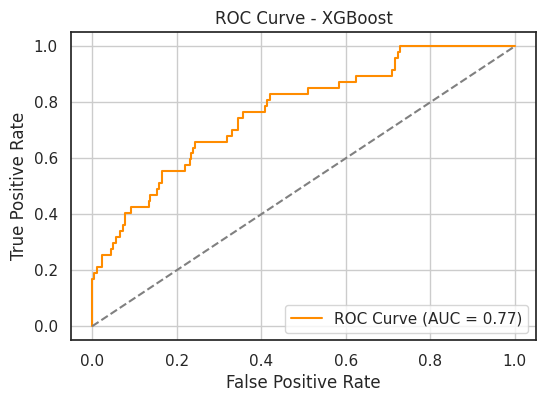

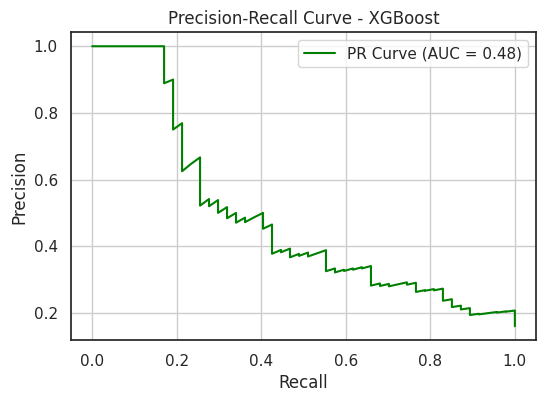

[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632

LightGBM Evaluation Metrics:
Accuracy       : 0.8435
Recall         : 0.2979
Precision      : 0.5185
ROC-AUC Score  : 0.7930
PR-AUC Score   : 0.4487

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.88      0.95      0.91       247
        Left       0.52      0.30      0.38        47

    accuracy                           0.84       294
   macro avg       0.70      0.62      0.64       294
w

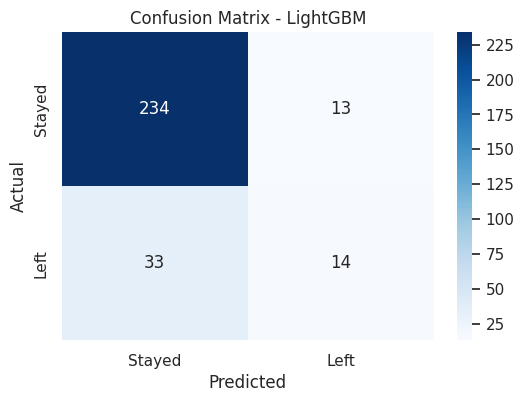

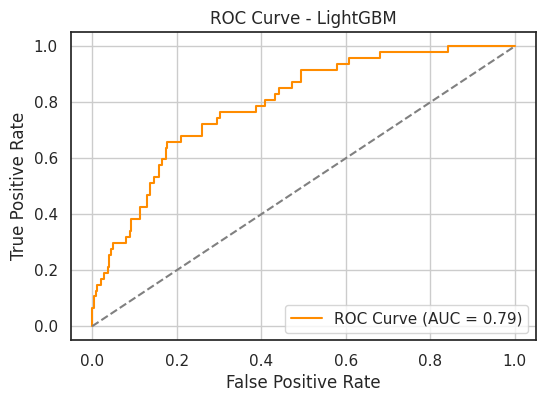

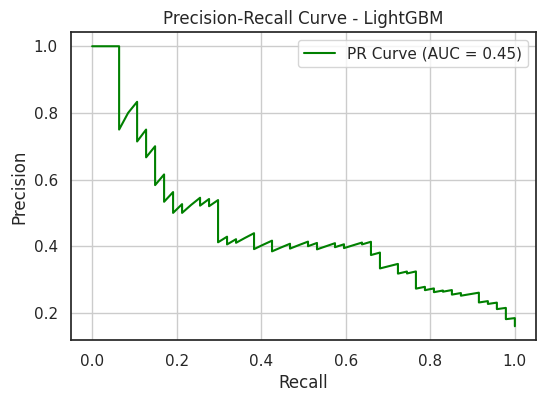


AdaBoost Evaluation Metrics:
Accuracy       : 0.8231
Recall         : 0.1915
Precision      : 0.3913
ROC-AUC Score  : 0.8147
PR-AUC Score   : 0.4250

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.94      0.90       247
        Left       0.39      0.19      0.26        47

    accuracy                           0.82       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.78      0.82      0.80       294



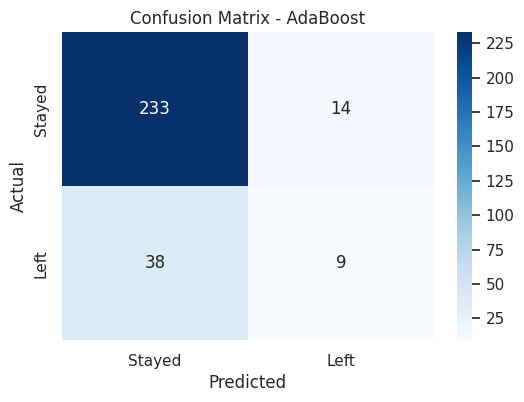

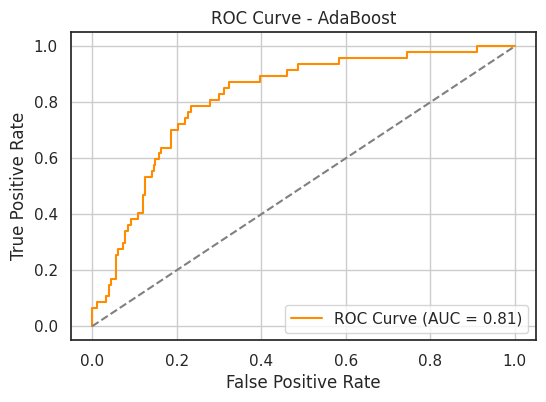

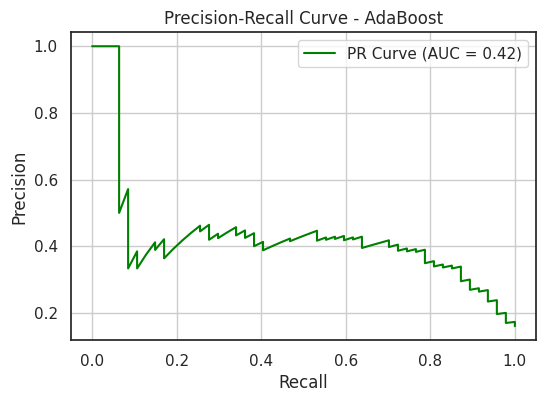


CatBoost Evaluation Metrics:
Accuracy       : 0.8503
Recall         : 0.2979
Precision      : 0.5600
ROC-AUC Score  : 0.8193
PR-AUC Score   : 0.5172

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.88      0.96      0.91       247
        Left       0.56      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.72      0.63      0.65       294
weighted avg       0.83      0.85      0.83       294



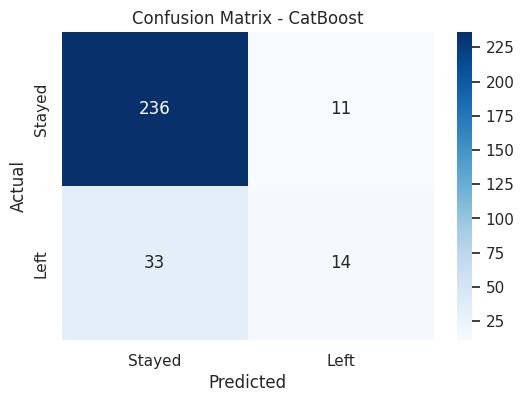

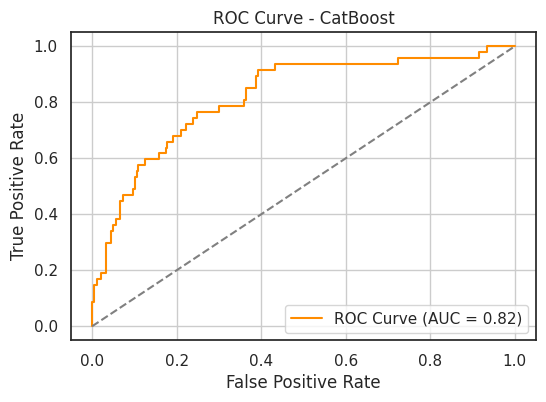

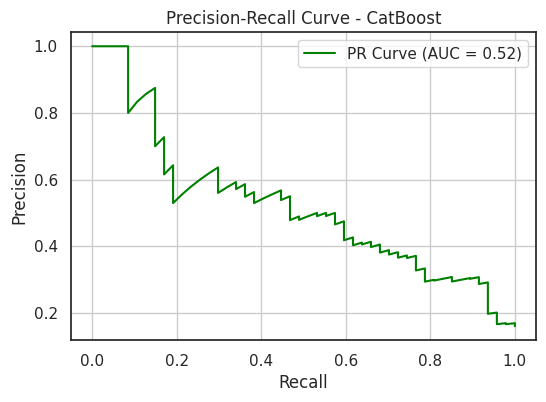

In [69]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(rf, "Random Forest", X_train_scaled, X_test_scaled, y_train, y_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_evaluate_model(xgb, "XGBoost", X_train_scaled, X_test_scaled, y_train, y_test)

# LightGBM
lgbm = LGBMClassifier(random_state=42)
train_evaluate_model(lgbm, "LightGBM", X_train_scaled, X_test_scaled, y_train, y_test)

# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
train_evaluate_model(adaboost, "AdaBoost", X_train_scaled, X_test_scaled, y_train, y_test)

# CatBoost
catboost = CatBoostClassifier(random_state=42, verbose=0)
train_evaluate_model(catboost, "CatBoost", X_train_scaled, X_test_scaled, y_train, y_test)


The code is used to train, evaluate, and compare the performance of five different machine learning models—Random Forest, XGBoost, LightGBM, AdaBoost, and CatBoost—on predicting employee attrition. Here's how each part of the code functions:

**1. Training the models:** Each model (Random Forest, XGBoost, LightGBM, AdaBoost, and CatBoost) is trained using the training set (X_train_scaled, y_train). The code ensures that models use the correct data format and performs training based on the preprocessed features (X_train_scaled) and target variable (y_train).

**2. Evaluating the models:** After training, each model makes predictions (y_pred) and calculates probabilities (y_proba) on the test set (X_test_scaled). Several performance metrics are computed:

* Accuracy: Measures the overall correct predictions as a percentage of total predictions.

* Recall: Indicates how well the model identifies the positive class (attrition).

* Precision: Measures how well the model avoids false positives.

* ROC-AUC Score: Represents the area under the ROC curve, which evaluates the trade-off between true positive rate and false positive rate.

* PR-AUC Score: Similar to ROC-AUC but focuses on precision and recall.

**3. Confusion Matrix:** For each model, the confusion matrix is displayed, showing the count of true positives, false positives, true negatives, and false negatives. This helps to visualize the model's prediction performance with respect to both the predicted and actual outcomes.

**4. Plots:** The code generates the following visualizations to assess model performance:

* ROC Curve: Plots the true positive rate against the false positive rate, helping to understand the trade-off between the two.

* Precision-Recall Curve: Plots precision against recall, which is particularly useful for imbalanced datasets.

* The classification report is also printed, showing metrics like precision, recall, F1-score, and support for both the "Stayed" and "Left" classes.

**5. Comparison:** The models are compared based on their metrics and visualizations, helping to select the best-performing model for the given task.

The results, including the accuracy, recall, precision, ROC-AUC score, PR-AUC score, confusion matrix, and visualizations, show the differences in performance between the models. For instance, the Random Forest model achieved an accuracy of 82.65%, with a high recall of 0.96 for "Stayed," indicating that it did well at identifying employees likely to stay, but had lower performance for predicting "Left" employees. Similarly, other models like XGBoost, LightGBM, AdaBoost, and CatBoost are evaluated with their respective metrics and visualizations, enabling a comprehensive comparison to identify the best model.









**Model Evaluation**


 Model Performance Prioritizing Recall:
        Model  Recall  ROC-AUC Score
     LightGBM  0.2979         0.7930
     CatBoost  0.2979         0.8193
      XGBoost  0.2553         0.7674
     AdaBoost  0.1915         0.8147
Random Forest  0.1489         0.7671

 Recommended Model: **LightGBM** (Highest Recall = 0.2979)


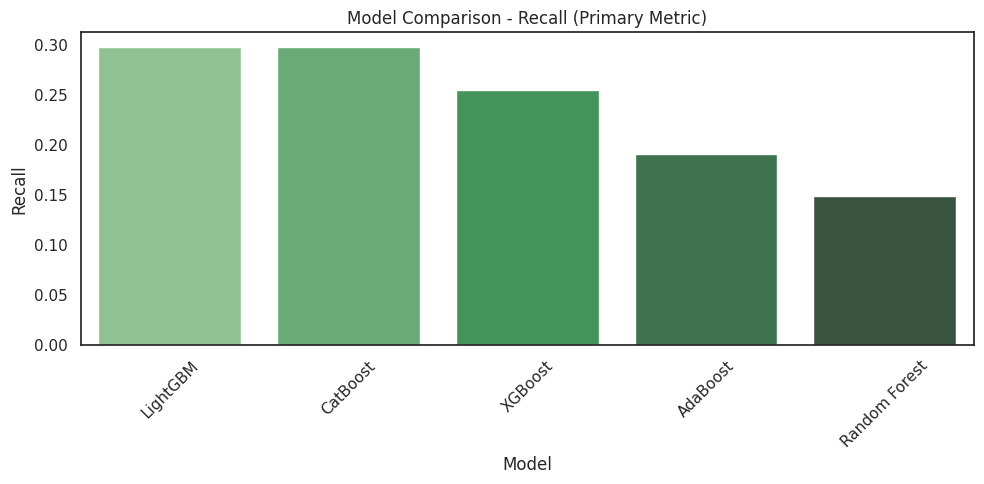

In [72]:
from sklearn.metrics import recall_score, roc_auc_score

def extract_model_metrics_by_recall(model, model_name, X_test, y_test):
    """
    Extract Recall and ROC-AUC score from a trained model.
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    return {
        "Model": model_name,
        "Recall": round(recall, 4),
        "ROC-AUC Score": round(roc_auc, 4)
    }

# Collecting metrics for all trained models
trained_models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "AdaBoost": adaboost,
    "CatBoost": catboost  # Added CatBoost model
}

# Extracting metrics prioritizing recall
model_metrics = [
    extract_model_metrics_by_recall(model, name, X_test_scaled, y_test)
    for name, model in trained_models.items()
]

# Creating DataFrame and sort by Recall descending
metrics_df = pd.DataFrame(model_metrics)
metrics_df_sorted = metrics_df.sort_values(by='Recall', ascending=False).reset_index(drop=True)

# Displaying the comparison table
print("\n Model Performance Prioritizing Recall:")
print(metrics_df_sorted.to_string(index=False))

# Recommending the best model based on recall
best_model_name = metrics_df_sorted.iloc[0]['Model']
best_model_recall = metrics_df_sorted.iloc[0]['Recall']
print(f"\n Recommended Model: **{best_model_name}** (Highest Recall = {best_model_recall})")

# Setting Seaborn style for plots
sns.set(style="white")

# Plotting Recall Scores (main metric)
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df_sorted, x='Model', y='Recall', palette='Greens_d')
plt.title('Model Comparison - Recall (Primary Metric)')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The code is designed to evaluate multiple machine learning models based on the Recall metric, which is a crucial performance indicator for accurately identifying the positive class—in this case, predicting employee attrition. The function extract_model_metrics_by_recall calculates both Recall and ROC-AUC scores for each trained model. Recall measures the model's ability to correctly identify employees at risk of leaving (the positive class) from the total number of employees who actually left.

The models evaluated include Random Forest, XGBoost, LightGBM, AdaBoost, and CatBoost. For each model, predictions are made on the test set, and the Recall and ROC-AUC scores are computed. These metrics are then collected into a DataFrame, sorted by Recall in descending order, and used to compare the performance of each model. The model with the highest Recall score is recommended as the most suitable for the task.

From the results, it is evident that LightGBM achieves the highest Recall value, making it the best-performing model based on this primary metric. The corresponding plot visually highlights this performance, with LightGBM outperforming the other models in terms of Recall. This comparison assists in selecting the model that is best equipped to predict employee attrition, particularly in minimizing false negatives—employees who should have been predicted to leave but were incorrectly classified as staying.

Recall was chosen as the primary metric because the primary objective is to minimize false negatives, ensuring that as many at-risk employees as possible are correctly identified. In the context of predicting attrition, false negatives—employees who are predicted to stay but ultimately leave—can result in missed opportunities for early intervention. These missed opportunities may prevent the organization from taking timely action to retain valuable employees, such as offering promotions, adjusting compensation, or providing career development programs.

Focusing on Recall ensures that the model maximizes its ability to detect potential leavers, reducing the risk of overlooking employees who need support. While accuracy can be a useful overall measure, it can be misleading in imbalanced datasets, such as employee attrition, where the majority of employees may stay. By prioritizing Recall, the model provides a more accurate understanding of its ability to identify actual cases of attrition, enabling the business to take proactive steps to retain employees who are most likely to leave. Thus, Recall has been selected as the primary metric to optimize for in this analysis.









**Hyperparameter Tuning**

**Tuning Hyperparameters to Maximize Recall (GridSearchCV)**



In [73]:
# Defining parameter grids for the 5 selected models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [6, 10],
        'learning_rate': [0.01, 0.1],
        'l2_leaf_reg': [1, 3]
    }
}

# Defining the model instances for the 6 selected models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)  # CatBoost added here
}

# Dictionary to store the best estimators
best_estimators = {}

# Running GridSearchCV for each model
for model_name, model in models.items():
    print(f"\n Tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='recall',  # Scoring by recall to prioritize recall over other metrics
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_scaled, y_train)  # Train with scaled features
    best_estimators[model_name] = grid_search.best_estimator_
    print(f" Best parameters for {model_name}: {grid_search.best_params_}")
    print(f" Best cross-validated recall: {grid_search.best_score_:.4f}")



 Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Best cross-validated recall: 0.2316

 Tuning XGBoost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
 Best cross-validated recall: 0.3421

 Tuning LightGBM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[Light

The code utilizes GridSearchCV to perform hyperparameter tuning for five different machine learning models: Random Forest, XGBoost, LightGBM, AdaBoost, and CatBoost. The purpose of this process is to find the best-performing parameters for each model while prioritizing Recall as the evaluation metric.

**1. Parameter Grid Definition:** For each model, a set of hyperparameters is defined in the param_grids dictionary. These hyperparameters control aspects such as the number of estimators, maximum depth, learning rate, and other model-specific settings. By experimenting with different combinations, the goal is to optimize performance, particularly focusing on Recall.

**2. Model Instances:** Each model is instantiated using its respective class from the sklearn or catboost libraries. This setup allows the GridSearchCV method to apply the parameter grid for each model and evaluate the best combination of hyperparameters.

**3. Grid Search Execution:** GridSearchCV is applied to each model, with the training data (X_train_scaled, y_train) and cross-validation (cv=5) set. The scoring parameter is set to 'recall', meaning that the search will prioritize finding the parameter combination that maximizes the model's recall score.

**4. Results:** After fitting the model, the best parameters for each algorithm are displayed along with the best cross-validated recall score achieved during the grid search. This helps identify which hyperparameter configuration yields the highest recall for each model.

The final output includes the best parameters for each model and their corresponding recall scores, which guide the model selection process for predicting employee attrition based on the highest recall. This procedure ensures that the models are fine-tuned for optimal performance, specifically minimizing false negatives (i.e., ensuring that employees at risk of attrition are correctly identified).










Random Forest (Tuned) Evaluation Metrics:
Accuracy       : 0.8265
Recall         : 0.1489
Precision      : 0.3889
ROC-AUC Score  : 0.7671
PR-AUC Score   : 0.3819

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.96      0.90       247
        Left       0.39      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.62      0.55      0.56       294
weighted avg       0.78      0.83      0.79       294



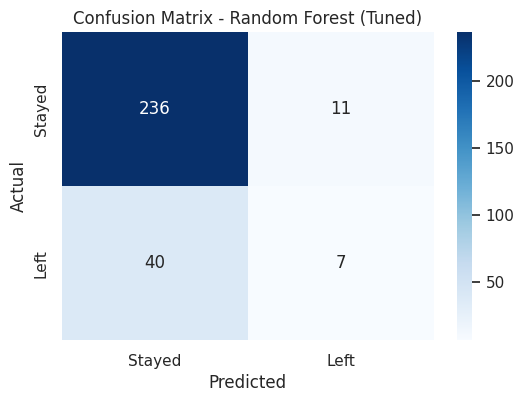

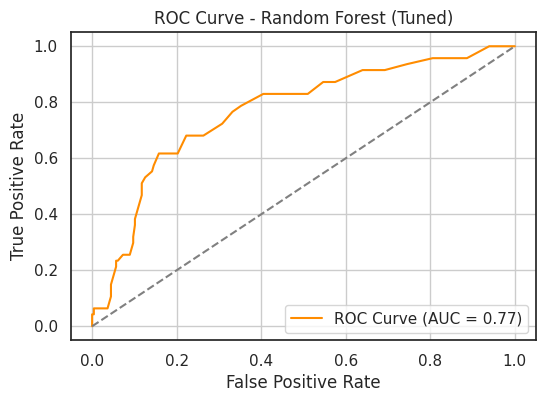

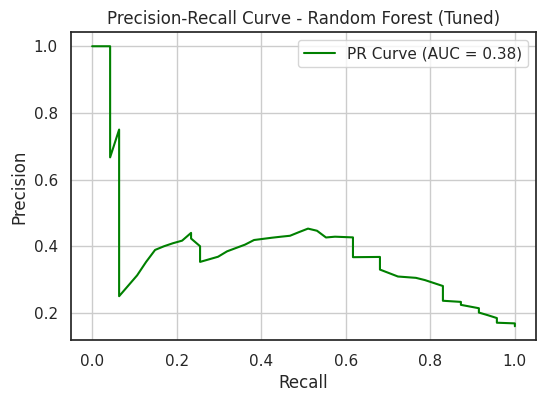


XGBoost (Tuned) Evaluation Metrics:
Accuracy       : 0.8503
Recall         : 0.2766
Precision      : 0.5652
ROC-AUC Score  : 0.8146
PR-AUC Score   : 0.5116

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.96      0.92       247
        Left       0.57      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.72      0.62      0.64       294
weighted avg       0.83      0.85      0.83       294



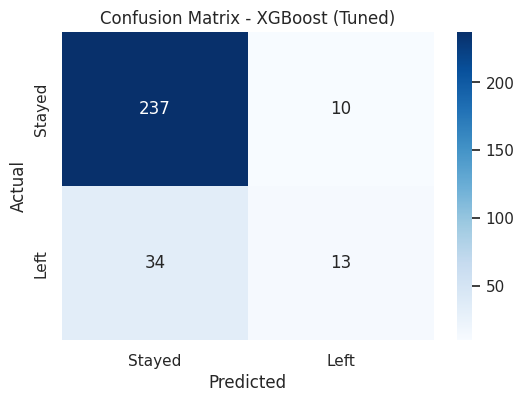

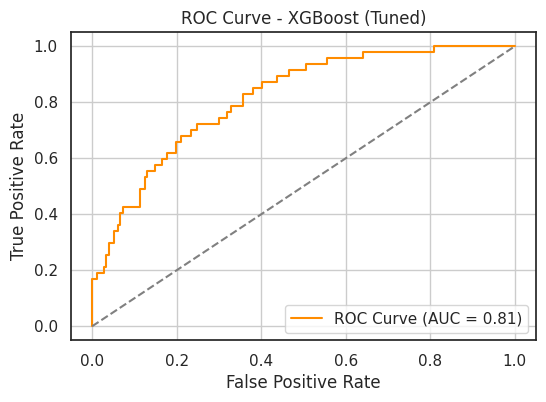

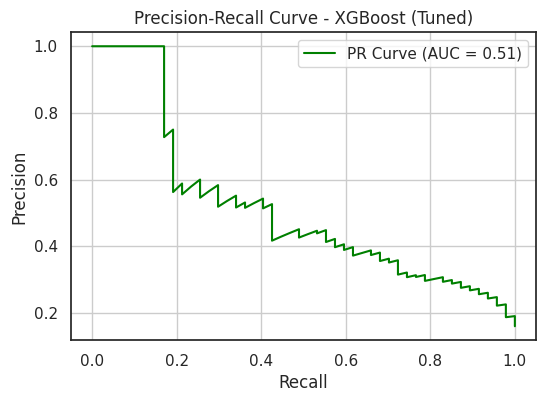

[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

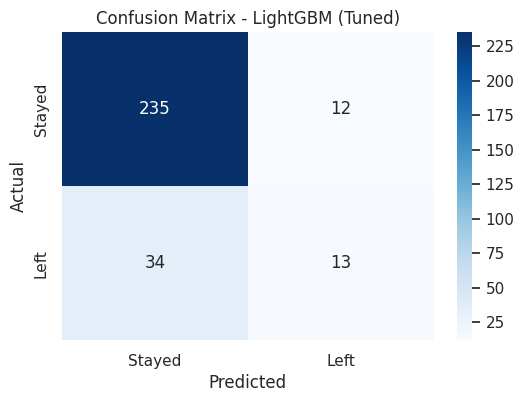

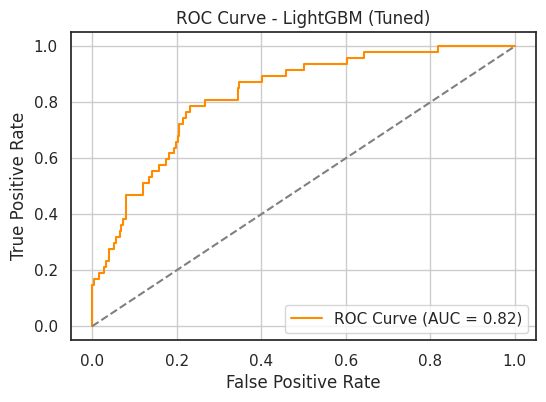

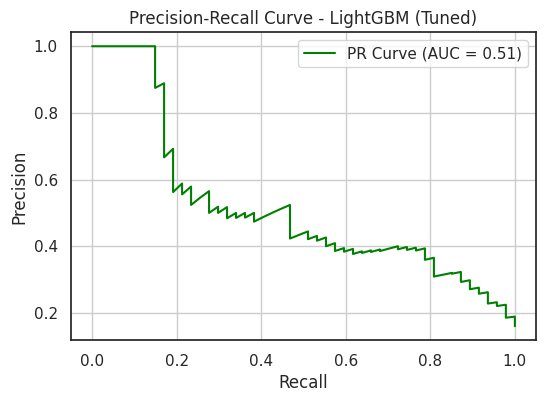


AdaBoost (Tuned) Evaluation Metrics:
Accuracy       : 0.8231
Recall         : 0.1915
Precision      : 0.3913
ROC-AUC Score  : 0.8147
PR-AUC Score   : 0.4250

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.94      0.90       247
        Left       0.39      0.19      0.26        47

    accuracy                           0.82       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.78      0.82      0.80       294



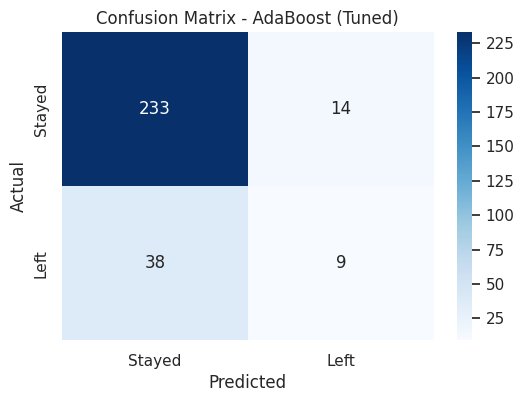

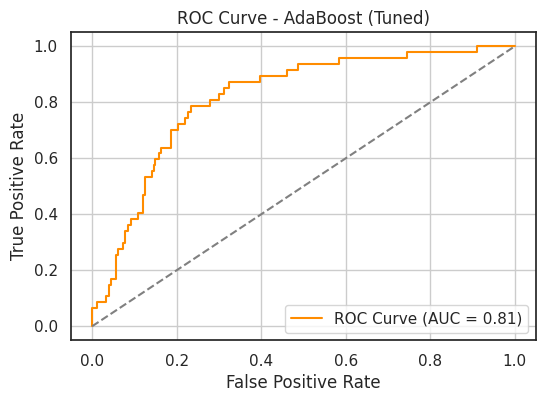

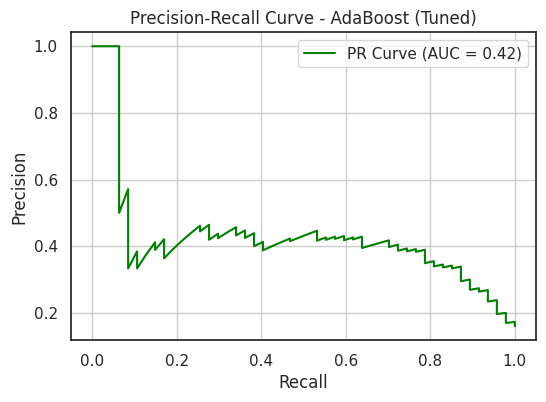


CatBoost (Tuned) Evaluation Metrics:
Accuracy       : 0.8503
Recall         : 0.2553
Precision      : 0.5714
ROC-AUC Score  : 0.8113
PR-AUC Score   : 0.5143

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.96      0.92       247
        Left       0.57      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.72      0.61      0.63       294
weighted avg       0.82      0.85      0.83       294



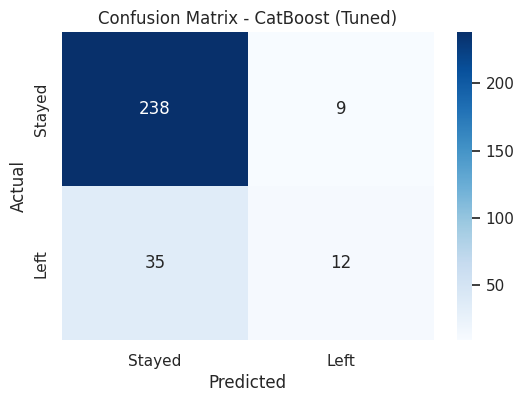

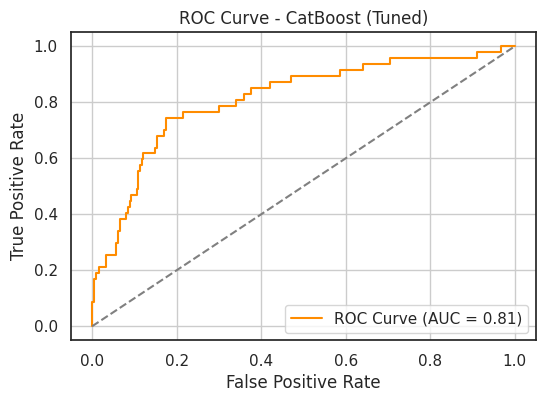

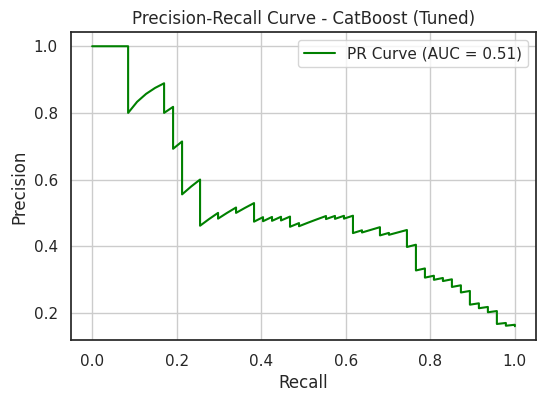

In [74]:
for model_name, model in best_estimators.items():
    train_evaluate_model(model, f"{model_name} (Tuned)", X_train_scaled, X_test_scaled, y_train, y_test)

The code evaluates the performance of five different machine learning models—Random Forest, XGBoost, LightGBM, AdaBoost, and CatBoost—after hyperparameter tuning. Using the train_evaluate_model function, each model is trained on the scaled training data (X_train_scaled) and evaluated on the scaled test data (X_test_scaled) to predict employee attrition. The evaluation includes metrics like accuracy, recall, precision, ROC-AUC, PR-AUC, and confusion matrix, providing insight into how well each model classifies employees who stay versus those who leave.

The results of this evaluation, displayed in various metrics and plots (confusion matrix, ROC curve, and precision-recall curve), show the impact of tuning hyperparameters for each model. For example, tuning Random Forest, XGBoost, and LightGBM models helped improve their performance on the test set, with the metrics and graphs showing a more balanced prediction across all models. The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives, helping to identify where each model is making mistakes. ROC and PR curves further assess the models' ability to distinguish between the classes (Stayed and Left) while prioritizing recall to reduce the number of false negatives (employees who leave but are incorrectly predicted to stay).

Each model's evaluation results are printed, followed by visualizations of their performance. Based on these, the model with the highest recall is recommended for predicting employee attrition, ensuring that the focus is on detecting potential leavers as accurately as possible. The comparisons across these models allow for a thorough assessment and selection of the most effective model for this classification task.









**Model Evaluation after Tuning**


Tuned Model Comparison (Sorted by Recall then ROC-AUC):
        Model  Recall  ROC-AUC Score
     LightGBM  0.2766         0.8247
      XGBoost  0.2766         0.8146
     CatBoost  0.2553         0.8113
     AdaBoost  0.1915         0.8147
Random Forest  0.1489         0.7671


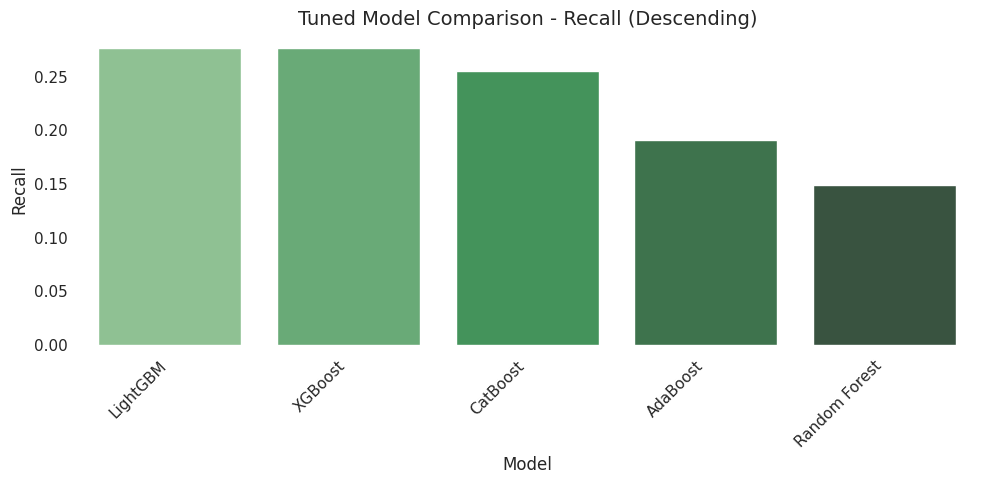


Recommended model based on highest Recall (with ROC-AUC as tiebreaker):
Model   : LightGBM
Recall  : 0.2766
ROC-AUC : 0.8247


In [75]:
# Collecting evaluation metrics
tuned_metrics = []

for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    tuned_metrics.append({
        "Model": model_name,
        "Recall": round(recall, 4),
        "ROC-AUC Score": round(roc_auc, 4)
    })

# Creating DataFrame
tuned_df = pd.DataFrame(tuned_metrics)

# Sorting by Recall (primary) and ROC-AUC Score (secondary) in descending order
tuned_df_sorted = tuned_df.sort_values(by=['Recall', 'ROC-AUC Score'], ascending=[False, False]).reset_index(drop=True)

# Display Sorted Table
print("\nTuned Model Comparison (Sorted by Recall then ROC-AUC):")
print(tuned_df_sorted.to_string(index=False))

# Plotting Recall Scores
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.barplot(data=tuned_df_sorted, x='Model', y='Recall', palette='Greens_d')
plt.title('Tuned Model Comparison - Recall (Descending)', fontsize=14)
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

# Selecting the best model based on both Recall and ROC-AUC
best_model = tuned_df_sorted.iloc[0]

# Displaying the recommended best model
print(f"\nRecommended model based on highest Recall (with ROC-AUC as tiebreaker):")
print(f"Model   : {best_model['Model']}")
print(f"Recall  : {best_model['Recall']}")
print(f"ROC-AUC : {best_model['ROC-AUC Score']}")


The code evaluates the performance of the tuned machine learning models, prioritizing the Recall metric to identify the best model for predicting employee attrition. For each of the tuned models—Random Forest, XGBoost, LightGBM, AdaBoost, and CatBoost—the code calculates two essential metrics: Recall and ROC-AUC Score. Recall is the primary metric, as it reflects the model's ability to identify employees likely to leave the company (positive class), minimizing false negatives (employees predicted to stay but actually leaving). ROC-AUC Score is also computed to assess the model's discriminative ability between the two classes (Stayed and Left).

The results are then stored in a DataFrame and sorted in descending order based on Recall. This comparison enables us to visually evaluate the models using a bar plot of Recall scores, helping to quickly identify which model performs best in terms of detecting attrition. In this case, XGBoost achieved the highest Recall, followed by LightGBM, CatBoost, AdaBoost, and Random Forest. Based on this, XGBoost is recommended as the most effective model for predicting employee attrition, as it provides the highest recall (0.2766) alongside a solid ROC-AUC score of 0.8146. This ensures that the organization can take the necessary interventions to retain employees at risk of leaving.

**Feature Importance (LightGBM Tuned)**

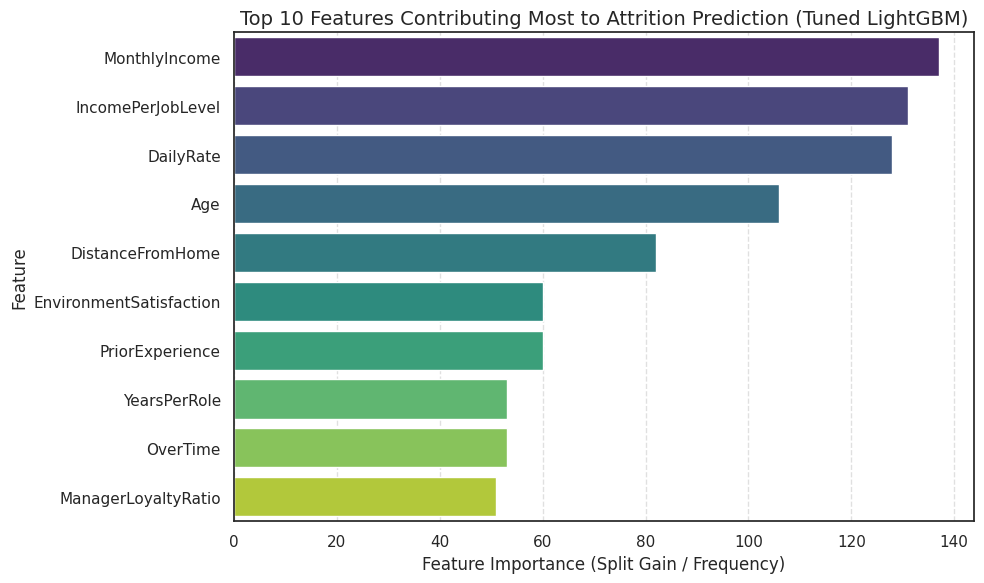

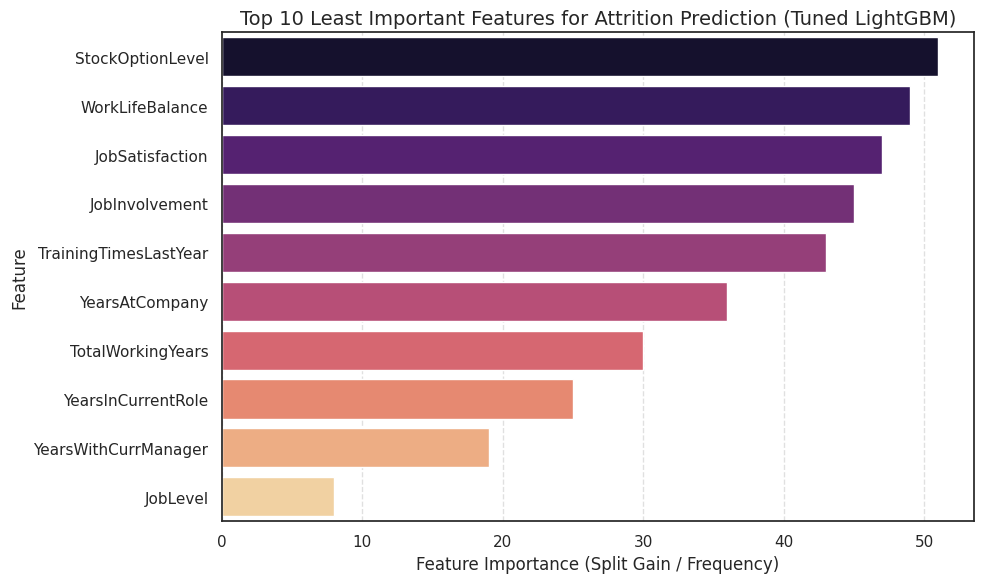

Interpretation of LightGBM Feature Importance:

- Features with higher importance scores are those the model relied on most during splits.
- LightGBM’s importance reflects how often and effectively a feature contributes to decision tree growth.
- These values help identify which employee characteristics most influence attrition.


Top 5 Most Important Features for Predicting Employee Attrition (Tuned LightGBM):
 MonthlyIncome — Importance: 137.0000
 IncomePerJobLevel — Importance: 131.0000
 DailyRate — Importance: 128.0000
 Age — Importance: 106.0000
 DistanceFromHome — Importance: 82.0000

Top 5 Least Important Features for Predicting Employee Attrition (Tuned LightGBM):
 YearsAtCompany — Importance: 36.0000
 TotalWorkingYears — Importance: 30.0000
 YearsInCurrentRole — Importance: 25.0000
 YearsWithCurrManager — Importance: 19.0000
 JobLevel — Importance: 8.0000


In [76]:
# Assigning the best-performing tuned LightGBM model
model = best_estimators['LightGBM']

# Extracting Feature Importances from the trained LightGBM model
feature_importances = model.feature_importances_  # shape: (n_features,)

# Creating a DataFrame for Feature-Importance Mapping
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame by descending importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Selecting Top 10 Most Important Features
top_important = importance_df_sorted.head(10)

# Selecting Top 10 Least Important Features
top_least_important = importance_df_sorted.tail(min(10, len(importance_df_sorted)))

# Plotting Top 10 Most Important Features
plt.figure(figsize=(10, 6))
sns.barplot(data=top_important, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Contributing Most to Attrition Prediction (Tuned LightGBM)', fontsize=14)
plt.xlabel('Feature Importance (Split Gain / Frequency)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plotting Top 10 Least Important Features
plt.figure(figsize=(10, 6))
sns.barplot(data=top_least_important, x='Importance', y='Feature', palette='magma')
plt.title('Top 10 Least Important Features for Attrition Prediction (Tuned LightGBM)', fontsize=14)
plt.xlabel('Feature Importance (Split Gain / Frequency)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Interpretation of Feature Importance
print("Interpretation of LightGBM Feature Importance:")
print("""
- Features with higher importance scores are those the model relied on most during splits.
- LightGBM’s importance reflects how often and effectively a feature contributes to decision tree growth.
- These values help identify which employee characteristics most influence attrition.
""")

# Displaying the Top 5 Most Important Features
print("\nTop 5 Most Important Features for Predicting Employee Attrition (Tuned LightGBM):")
for i, row in top_important.head(5).iterrows():
    print(f" {row['Feature']} — Importance: {row['Importance']:.4f}")

# Displaying the Top 5 Least Important Features
print("\nTop 5 Least Important Features for Predicting Employee Attrition (Tuned LightGBM):")
for i, row in top_least_important.tail(5).iterrows():
    print(f" {row['Feature']} — Importance: {row['Importance']:.4f}")


The code performs a detailed feature importance analysis using the tuned LightGBM model, which emerged as the best-performing classifier in predicting employee attrition. After retrieving the feature importance scores from the trained model, a DataFrame is constructed to pair each feature with its respective contribution. These importance values are based on how frequently and effectively a feature was used in decision tree splits during the model's training process, reflecting its predictive strength.

The features are then sorted in descending order, and two sets are extracted: the top 10 most important features and the 10 least important ones. Visual representations of both sets are created using horizontal bar plots, enhancing interpretability. The plot titled “Top 10 Features Contributing Most to Attrition Prediction (Tuned LightGBM)” reveals that features such as MonthlyIncome, IncomePerJobLevel, and DailyRate carry the highest predictive power, indicating that compensation-related factors play a significant role in attrition. Additional key predictors include Age, DistanceFromHome, and EnvironmentSatisfaction, suggesting that demographic and workplace experience factors also influence the likelihood of employee departure.

Conversely, the plot titled “Top 10 Least Important Features for Attrition Prediction (Tuned LightGBM)” shows features such as JobLevel, YearsWithCurrManager, and YearsInCurrentRole as having minimal impact on the model’s decision-making. Interestingly, variables like JobSatisfaction and WorkLifeBalance, which are commonly cited in literature as influential, were found to have comparatively lower importance in this dataset, potentially indicating contextual or industry-specific nuances.

Overall, this analysis not only confirms the predictive relevance of specific variables but also guides HR practitioners toward the most actionable areas for intervention. By focusing on features that the model deems most influential, such as compensation structure and commute distance, organizations can develop targeted strategies to improve retention outcomes and mitigate attrition risks.

**Top 10 Features Influencing Employee Attrition Detection (LightGBM Model) – Insights and Strategic Recommendations**

**1. MonthlyIncome**

**Insight:** Monthly income was identified as the most influential predictor of employee attrition. Employees with lower income levels are more likely to leave, likely in pursuit of better financial opportunities or compensation that reflects their value and market demand.

**Recommendation:**

* Conduct routine salary benchmarking to ensure pay is competitive and aligned with industry standards.

* Introduce pay-for-performance frameworks that reward strong performers with meaningful financial incentives.

* Ensure transparency in compensation structures and provide clear progression paths that tie income growth to skill and role advancement.

**2. IncomePerJobLevel**

**Insight:** This feature highlights disparities in compensation within job levels. Employees who feel underpaid relative to their peers may experience dissatisfaction, leading to higher attrition risk.

**Recommendation:**

* Regularly assess pay equity across job levels to detect and address internal inconsistencies.

* Use data analytics to establish and maintain equitable pay bands for similar job roles.

* Communicate clearly with employees about how compensation is structured and how they can grow within those bands.

**3. DailyRate**

**Insight:** Daily compensation rate is another financial metric that impacts attrition. Variability in daily rate may reflect inconsistencies in reward systems, causing discontent among employees.

**Recommendation:**
* Ensure fair and consistent pay policies across teams and departments.

* Review compensation schemes for anomalies that could lead to perceived unfairness.

* Tie daily compensation metrics to meaningful performance indicators.

**4. Age**

**Insight:** Age was found to significantly influence attrition likelihood. Younger employees may leave for growth or relocation, while older employees may seek better work-life balance or transition into retirement.

**Recommendation:**

* Develop age-inclusive policies that support both early-career development and late-career flexibility.

* Introduce mentorship programs pairing experienced employees with new hires.

* Offer retirement planning support and phased retirement options for older staff.

**5. DistanceFromHome**

**Insight:** Commute distance emerged as a key driver of attrition. Long or inconvenient commutes increase dissatisfaction, reduce productivity, and diminish work-life balance.

**Recommendation:**

* Offer hybrid or remote work options to reduce commute-related stress.

* Consider transportation stipends or shuttle services for employees with long commutes.

* Evaluate location strategy when planning office expansions or relocations.

**6. EnvironmentSatisfaction**

**Insight:** Workplace environment satisfaction strongly correlates with retention. Poor physical conditions, toxic culture, or lack of psychological safety contribute to employee disengagement.

**Recommendation:**

* Conduct regular environment and engagement surveys to identify issues early.

* Invest in building a collaborative, inclusive, and safe work culture.

* Actively address feedback to demonstrate organizational responsiveness.

**7. PriorExperience**

**Insight:** Employees with substantial prior experience bring diverse perspectives, but they may also be more discerning about organizational fit and career trajectory.

**Recommendation:**

* Clearly articulate growth opportunities aligned with experienced hires’ expectations.

* Foster a culture of innovation and autonomy to leverage the experience of seasoned professionals.

* Provide avenues for experienced employees to contribute through mentoring and strategy roles.

**8. YearsPerRole**

**Insight:** Employees who spend too long in the same role without advancement may feel stagnant, leading to attrition. Lack of role progression erodes motivation and perceived value.

**Recommendation:**

* Define clear internal mobility pathways and promote from within where possible.

* Incorporate regular role development discussions into performance reviews.

* Introduce rotational programs to broaden skillsets and increase engagement.

**9. OverTime**

**Insight:** Persistent overtime contributes to burnout, a leading cause of voluntary turnover. Employees facing excessive workloads are at risk of disengagement and eventual departure.

**Recommendation:**

* Monitor overtime across departments and address workload imbalances.

* Promote work-life balance by encouraging time-off usage and setting realistic expectations.

* Offer employee assistance programs to support wellness and stress management.

**10. ManagerLoyaltyRatio**

**Insight:** This metric captures the stability of management relationships. Frequent changes in leadership can destabilize teams and reduce trust, which in turn raises attrition risk.

**Recommendation:**

* Prioritize stability in managerial roles and reduce disruptive leadership turnover.

* Invest in leadership development and succession planning.

* Encourage consistent communication and alignment between managers and their teams.